In [1]:
import numpy as np
import pandas as pd
import sympy as sm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib_inline.backend_inline import set_matplotlib_formats
plt.style.use('seaborn-v0_8')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (10, 4)
}
set_matplotlib_formats('svg', 'pdf')

In [2]:
def smooth_data(data, window_size):
    return data.rolling(window=window_size, min_periods=1).mean()

# Function for the decay exponential
def decay_func(t, A, k, C):
    return A * np.exp(-k * t) + C

t = sm.symbols('t')
def decay_func_sm(t, A, k, C):
    return A * sm.exp(-k * t) + C

In [3]:
df = pd.read_csv('/Users/ammar-imac/Documents/NMR/tek0004CH1H_OSE.csv')
df = df[19:]
df.columns = ['TIME', 'CH1']

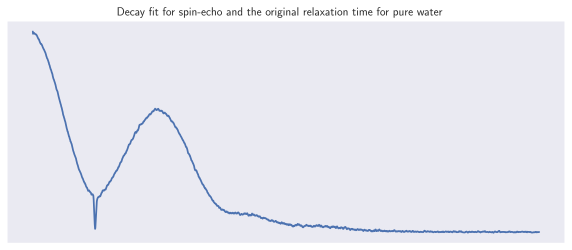

In [4]:
val = np.argmax(df.CH1)
plt.plot(df.TIME.iloc[val:], smooth_data(df.CH1.iloc[val:], 20))
plt.xticks([])
plt.yticks([])  
plt.title("Decay fit for spin-echo and the original relaxation time for pure water")
plt.show()

In [5]:
df = pd.read_csv('/Users/ammar-imac/Downloads/NMR/tek0008ALLLLLLL.csv')
df = df[19:]
df.columns = ['TIME', 'CH1']
val = np.argmax(df.CH1)
t_data = df.TIME.iloc[val:].astype(float)
y_data = smooth_data(df.CH1.iloc[val:], 50).astype(float)
params, covariance = curve_fit(decay_func, t_data, y_data)

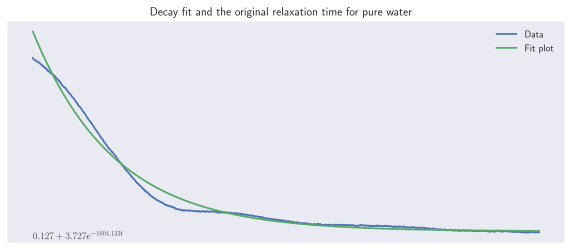

In [6]:
plt.plot(df.TIME.iloc[val:], smooth_data(df.CH1.iloc[val:], 10), label='Data')
plt.plot(
    df.TIME.iloc[val:], decay_func(df.TIME.iloc[val:].astype(float), *params),
    label='Fit plot'
)

plt.xticks([])
plt.yticks([])  
plt.text(0, 0, sm.latex(decay_func_sm(t, *[round(val, 3) for val in params]), mode='inline'))
plt.title("Decay fit and the original relaxation time for pure water")
plt.legend()
plt.show()

In [7]:
df = pd.read_csv('/Users/ammar-imac/Documents/NMR/tek0001CH1.csv')
df = df[19:]
df.columns = ['TIME', 'CH1']
val = np.argmax(df.CH1)
t_data = df.TIME.iloc[val:].astype(float)
y_data = smooth_data(df.CH1.iloc[val:], 50).astype(float)
params, covariance = curve_fit(decay_func, t_data, y_data)

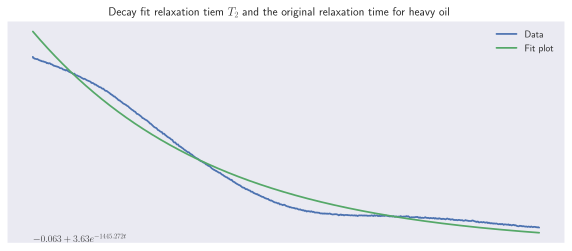

In [8]:
val = np.argmax(df.CH1)
plt.plot(df.TIME.iloc[val:], smooth_data(df.CH1.iloc[val:], 10), label='Data')
plt.plot(
    df.TIME.iloc[val:], decay_func(df.TIME.iloc[val:].astype(float), *params),
    label='Fit plot'
)

plt.xticks([])
plt.yticks([])  
plt.text(0, 0, sm.latex(decay_func_sm(t, *[round(val, 3) for val in params]), mode='inline'))
plt.title("Decay fit relaxation tiem $T_2$ and the original relaxation time for heavy oil")
plt.legend()
plt.show()

In [9]:
df = pd.read_csv('/Users/ammar-imac/Documents/NMR/tek0009CHWSSS1.csv')
df = df[19:]
df.columns = ['TIME', 'CH1']
# fit plot
val = np.argmax(df.CH1)
t_data = df.TIME.iloc[val:].astype(float)
y_data = smooth_data(df.CH1.iloc[val:], 50).astype(float)
params, covariance = curve_fit(decay_func, t_data, y_data)

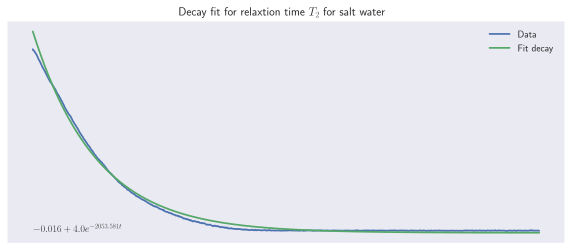

In [10]:
val = np.argmax(df.CH1)
plt.plot(df.TIME.iloc[val:], smooth_data(df.CH1.iloc[val:], 10),
        label='Data')
plt.plot(
    df.TIME.iloc[val:], decay_func(df.TIME.iloc[val:].astype(float), *params),
    label='Fit decay'
)

plt.xticks([])
plt.yticks([])  
plt.text(0, 0, sm.latex(decay_func_sm(t, *[round(val, 3) for val in params]), mode='inline'))
plt.title("Decay fit for relaxtion time $T_2$ for salt water")
plt.legend()
plt.show()